In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set_style('whitegrid')

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Log Transform on Yelp Reviews Dataset

In [2]:
## Load the data
biz_f = open('data/yelp_dataset/business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

In [3]:
## Compute the log transform of the review count
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

Text(0, 0.5, 'Occurrence')

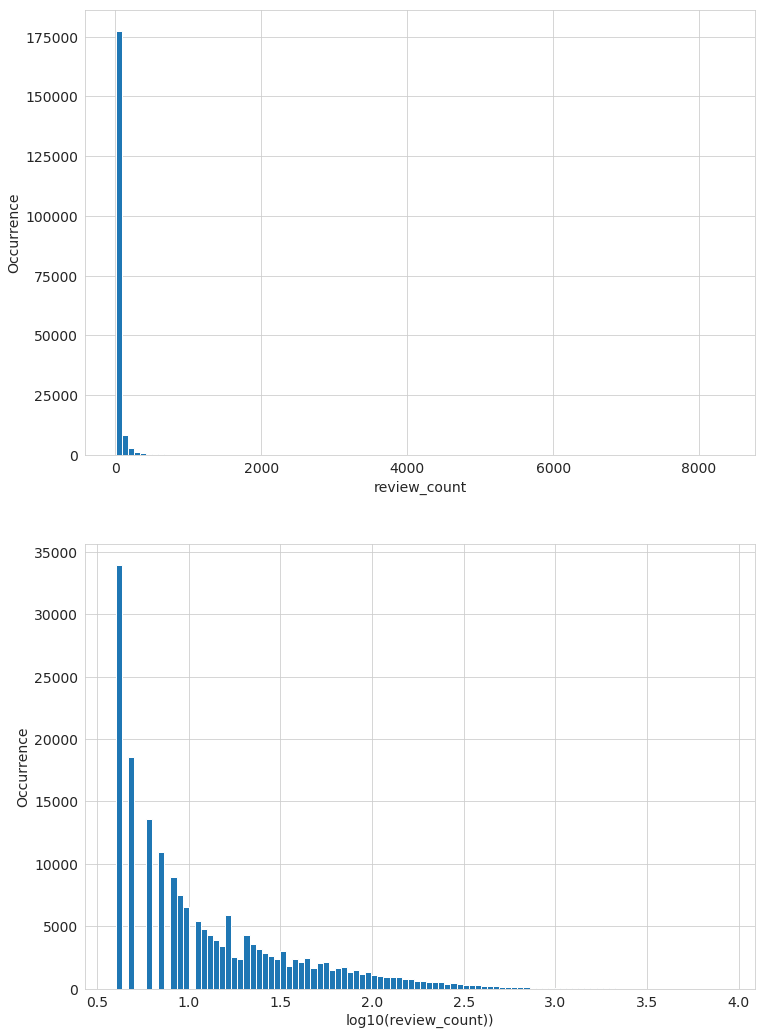

In [4]:
## Visualize the distribution of review counts before and after log transform
plt.figure(figsize=(12, 18))
ax = plt.subplot(2,1,1)
biz_df['review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
biz_df['log_review_count'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 例2-7 新闻文章流行度分布的可视化，使用对数变换和不使用对数变换
Plot the distribution of number of tokens with and without log transform

In [26]:
df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=', ', engine='python')

In [27]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [28]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


Text(0, 0.5, 'Number of Articles')

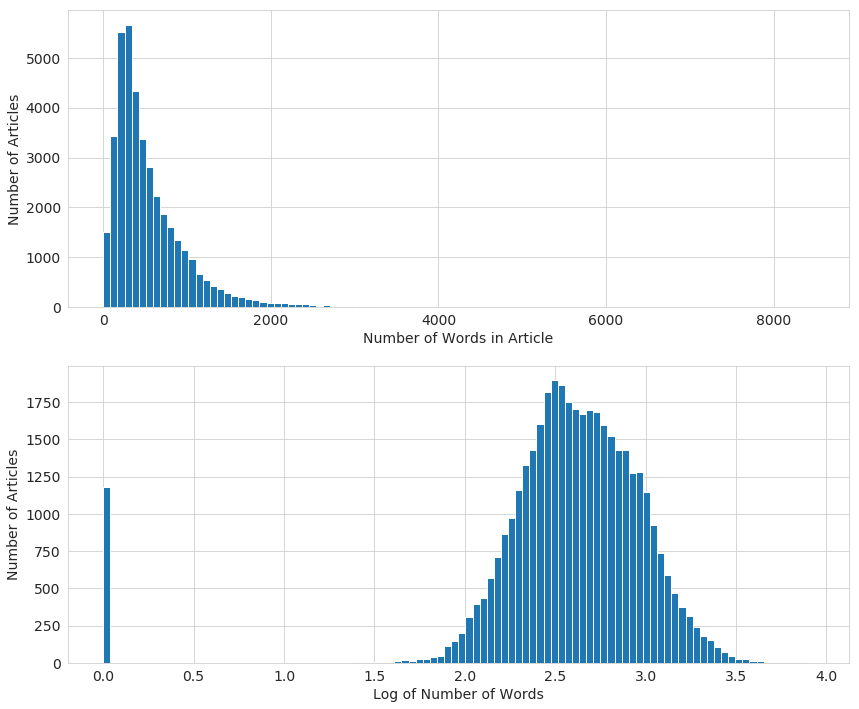

In [39]:
plt.figure(figsize=(14,12))
ax = plt.subplot(2,1,1)
df['n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

# 对数变换实战

### 10-折交叉验证的线性回归

In [41]:
## Train linear regression models to predict the average stars rating of a business,
## using the review_count feature with and without log transformation
## Compare the 10-fold cross validation score of the two models
# 使用前面加载的Yelp点评数据框，计算Yelp点评数量的对数变换值。 
# 注意，我们为原始点评数量加1，以免当点评数量为0时，对数运算结果得到负无穷大。
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)
# 使用经过对数变换和未经对数变换的review_count特征，训练线性回归模型预测 
# 一个商家的平均星级评分。比较两种模型的10-折交叉验证得分。
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00160 (+/- 0.00090)
R-squared score with log transform: 0.00408 (+/- 0.00147)


## 例 2-9使用在线新闻流行度数据集中经对数变换后的单词个数预测文章流行度
Log Transform on Online News Popularity Dataset

In [26]:
df = pd.read_csv('data/OnlineNewsPopularity/OnlineNewsPopularity.csv', sep=', ', engine='python')

In [27]:
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [28]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [46]:
# 训练两个线性回归模型来预测文章的分享数，一个模型使用初始的特征， 
# 另一个模型使用对数变换后的特征。
news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## 例 2-10 新闻流行度预测问题中输入和输出相关性的可视化
Visualize the correlation between the input and the output

Text(0, 0.5, 'Number of Shares')

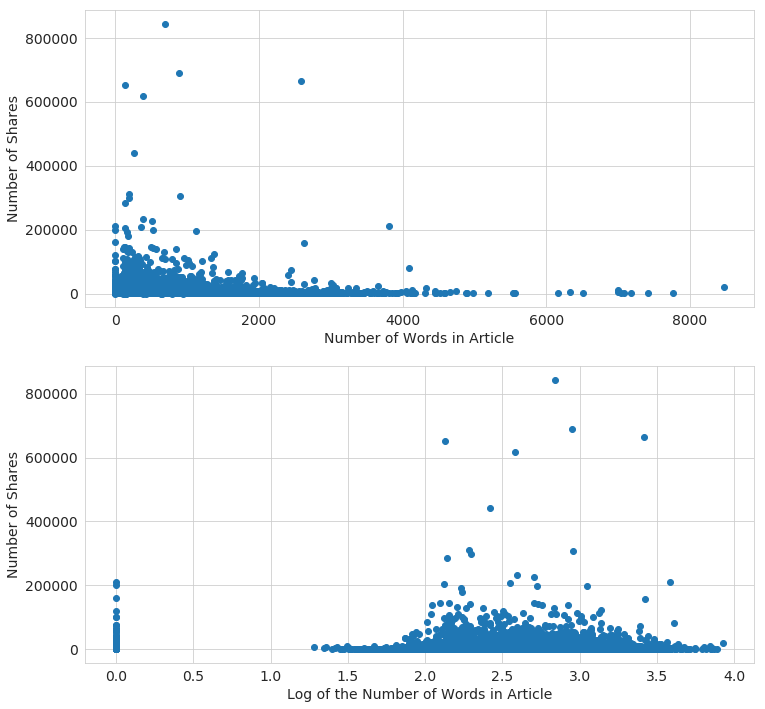

In [48]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot(2,1,1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

<IPython.core.display.Javascript object>


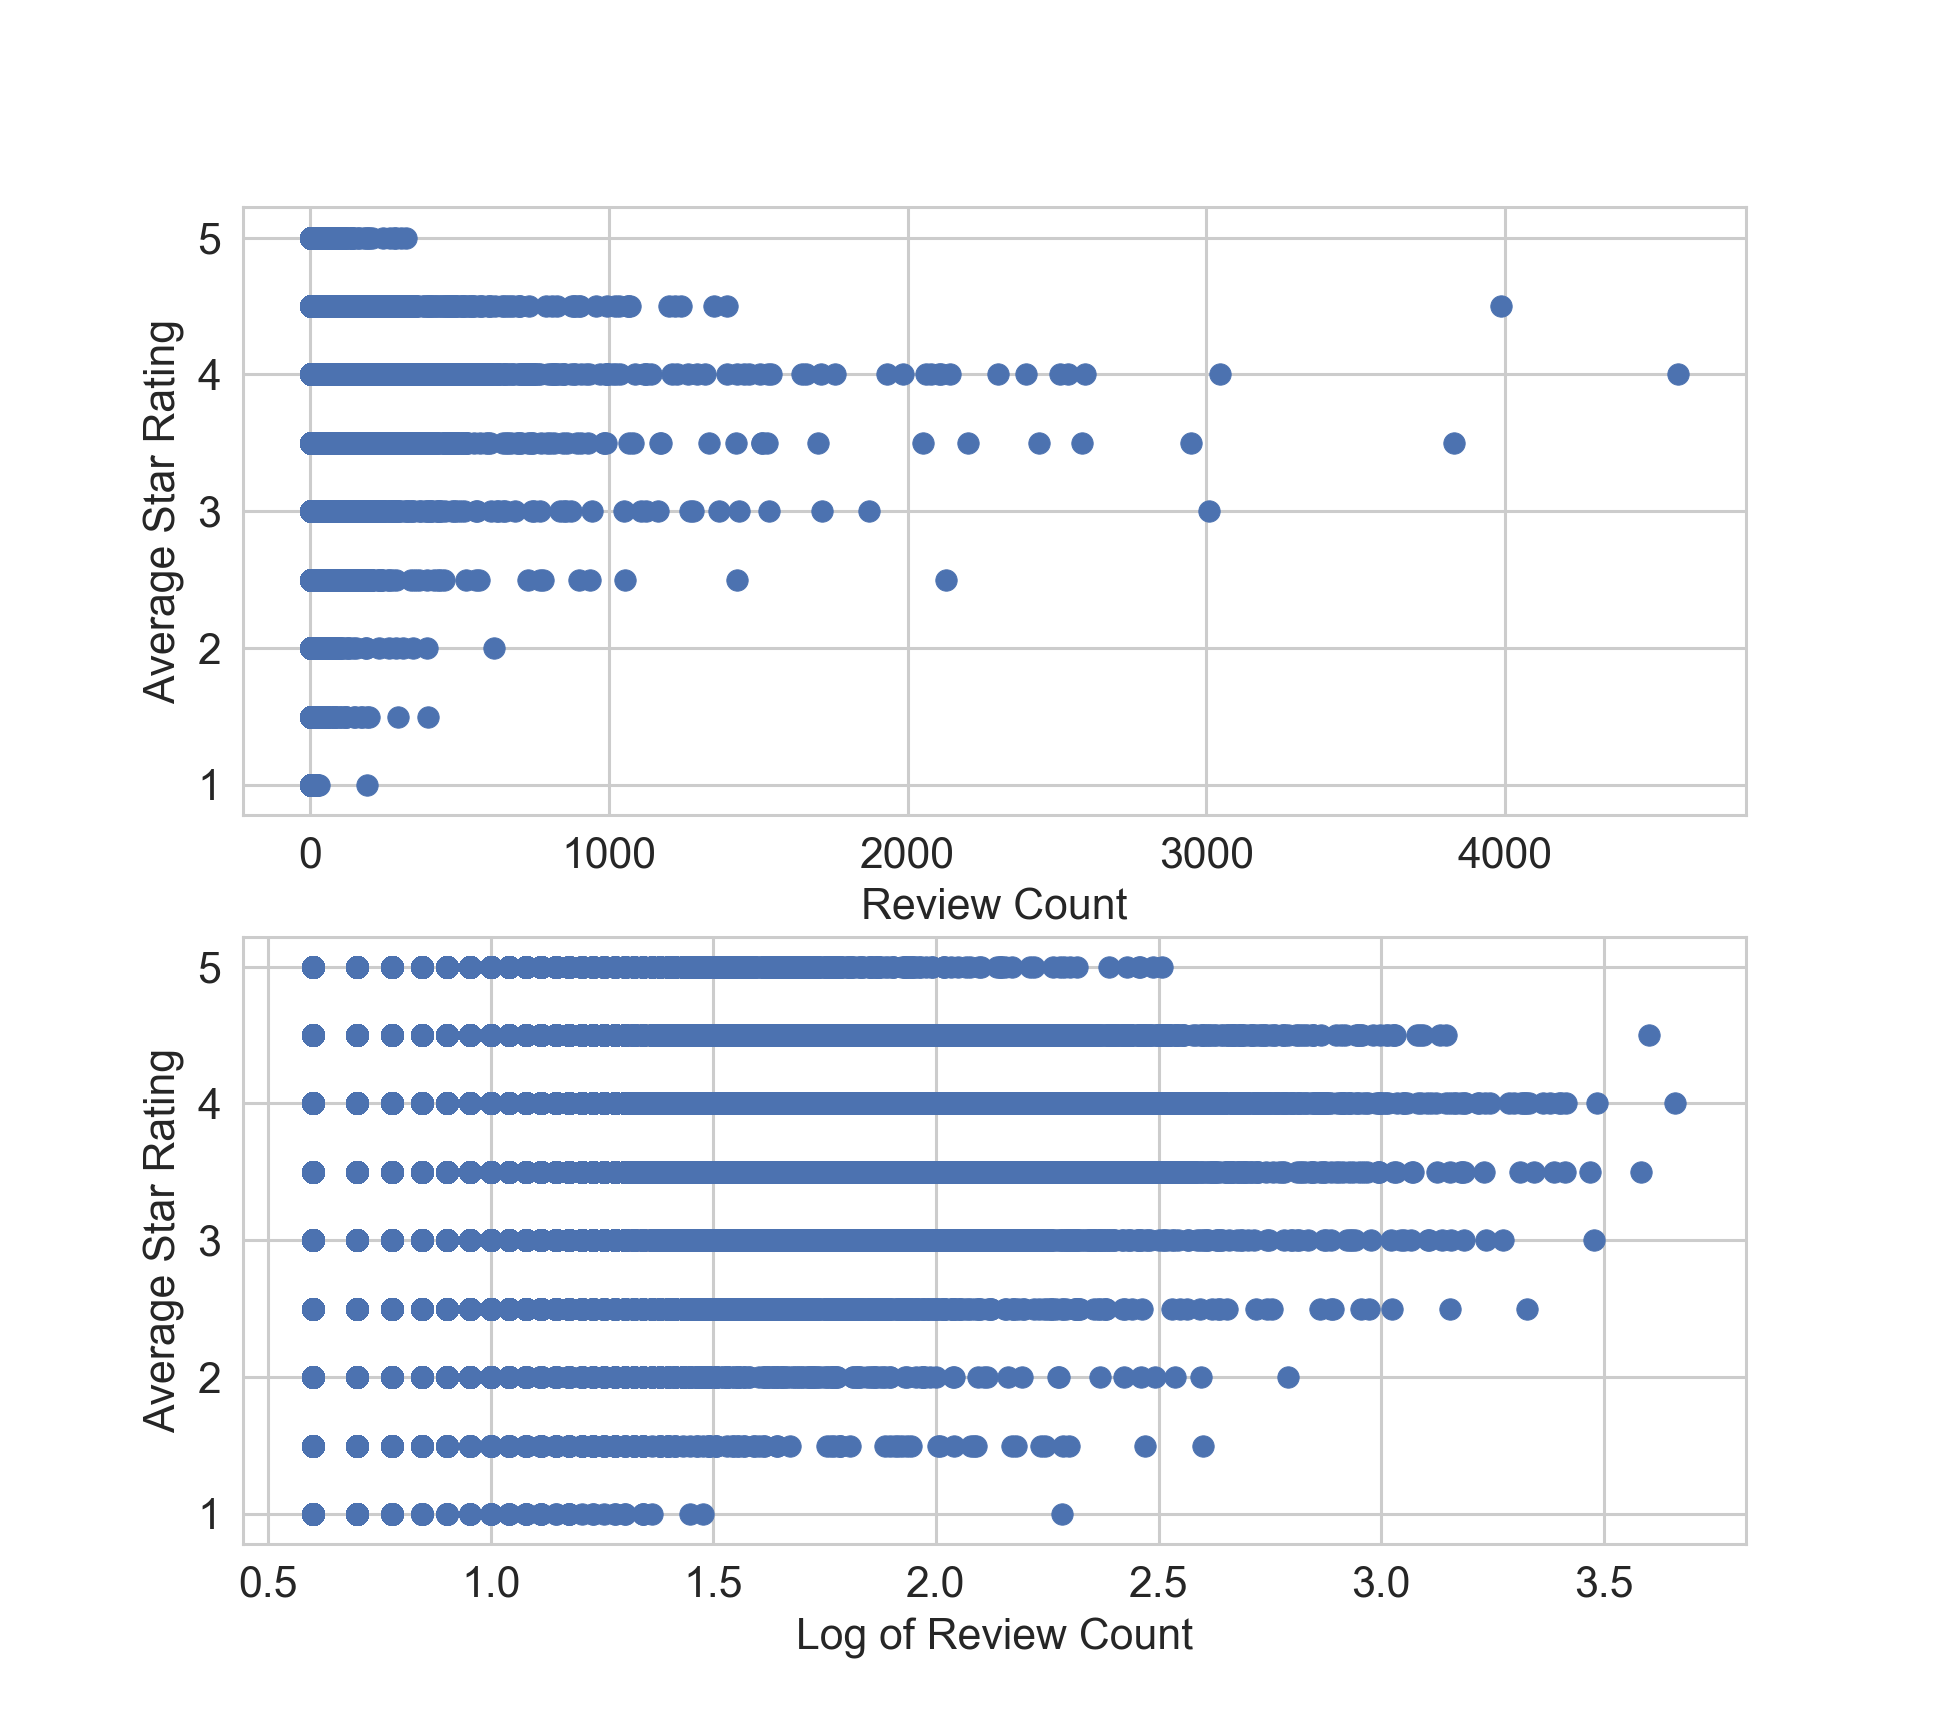

In [86]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)